rates = (0.001, 0.01, 0.1)
batch_sizes = (64, 128, 256)
dropout_probs = (0.4, 0.5, 0.6)

In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import pandas as pd
import json
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

In [13]:
n_epochs = 20

In [14]:
acc_files = glob('nn_*_accuracies.npy')
trials = [f.split('_accuracies.npy')[0] for f in acc_files]

traces = np.zeros((len(trials), n_epochs))
for i, f in enumerate(acc_files):
    traces[i, :] = np.load(f) 

In [15]:
def read_hyper(trial_name):

    with open(trial_name + '_hyper.json') as f:
        hyper_dict = json.loads(f.readlines()[0])
        
    return hyper_dict

In [16]:
df = pd.DataFrame({tr: read_hyper(tr) for tr in trials}).T
df['max_acc'] = np.zeros(len(df))

for name, t in zip(trials, traces):
    df.loc[name]['max_acc'] = t.max()
    
df.sort_values(by=['max_acc'], inplace=True, ascending=False)

df

,batch_size,keep_prob,rate,max_acc
nn_2018-01-21_000521,64.0,0.5,0.001,0.957370
nn_2018-01-21_001930,64.0,0.6,0.001,0.954875
nn_2018-01-21_010124,128.0,0.6,0.001,0.950340
nn_2018-01-21_004733,128.0,0.5,0.001,0.948980
nn_2018-01-21_014237,256.0,0.6,0.001,0.944671
nn_2018-01-20_235207,64.0,0.4,0.001,0.936961
nn_2018-01-21_012854,256.0,0.5,0.001,0.936281
nn_2018-01-21_003342,128.0,0.4,0.001,0.931066
nn_2018-01-21_011517,256.0,0.4,0.001,0.917914
nn_2018-01-21_034838,256.0,0.6,0.010,0.897732


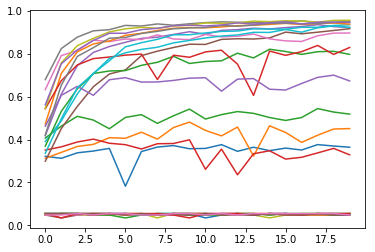

In [17]:
plt.figure()
for i in range(len(traces)):
    plt.plot(traces[i, :])